In [15]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report
%matplotlib inline

writing = pd.read_csv('letter-recognition.data')

writing

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


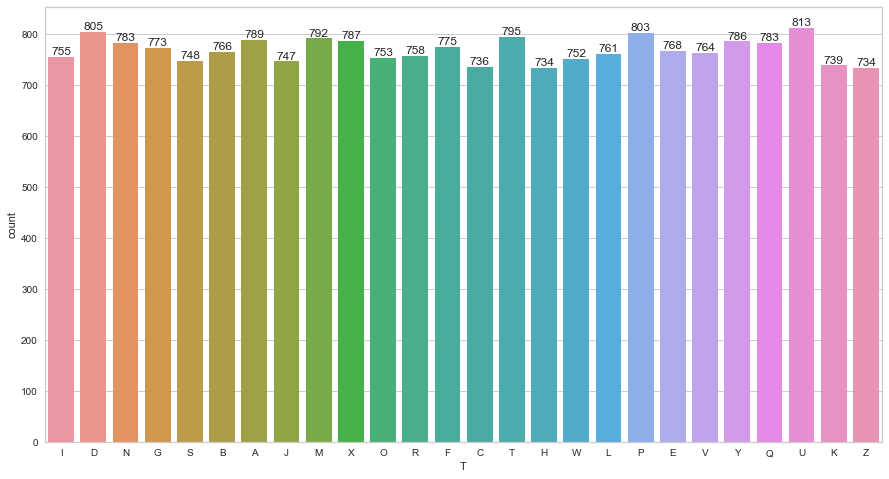

In [47]:
plt.figure(figsize = (15, 8))
plot=sns.countplot(data=writing, x="T")
for container in plot.containers:
    plot.bar_label(container)

In [48]:
#this shows the relations between features.
heatmap_data = writing[["2", "8","3","5","1","8","1","13","0","6","6.1","10","8.2","0.1","8.3","0.2","8.4"]]

<AxesSubplot:title={'center':'Correlation of Features'}>

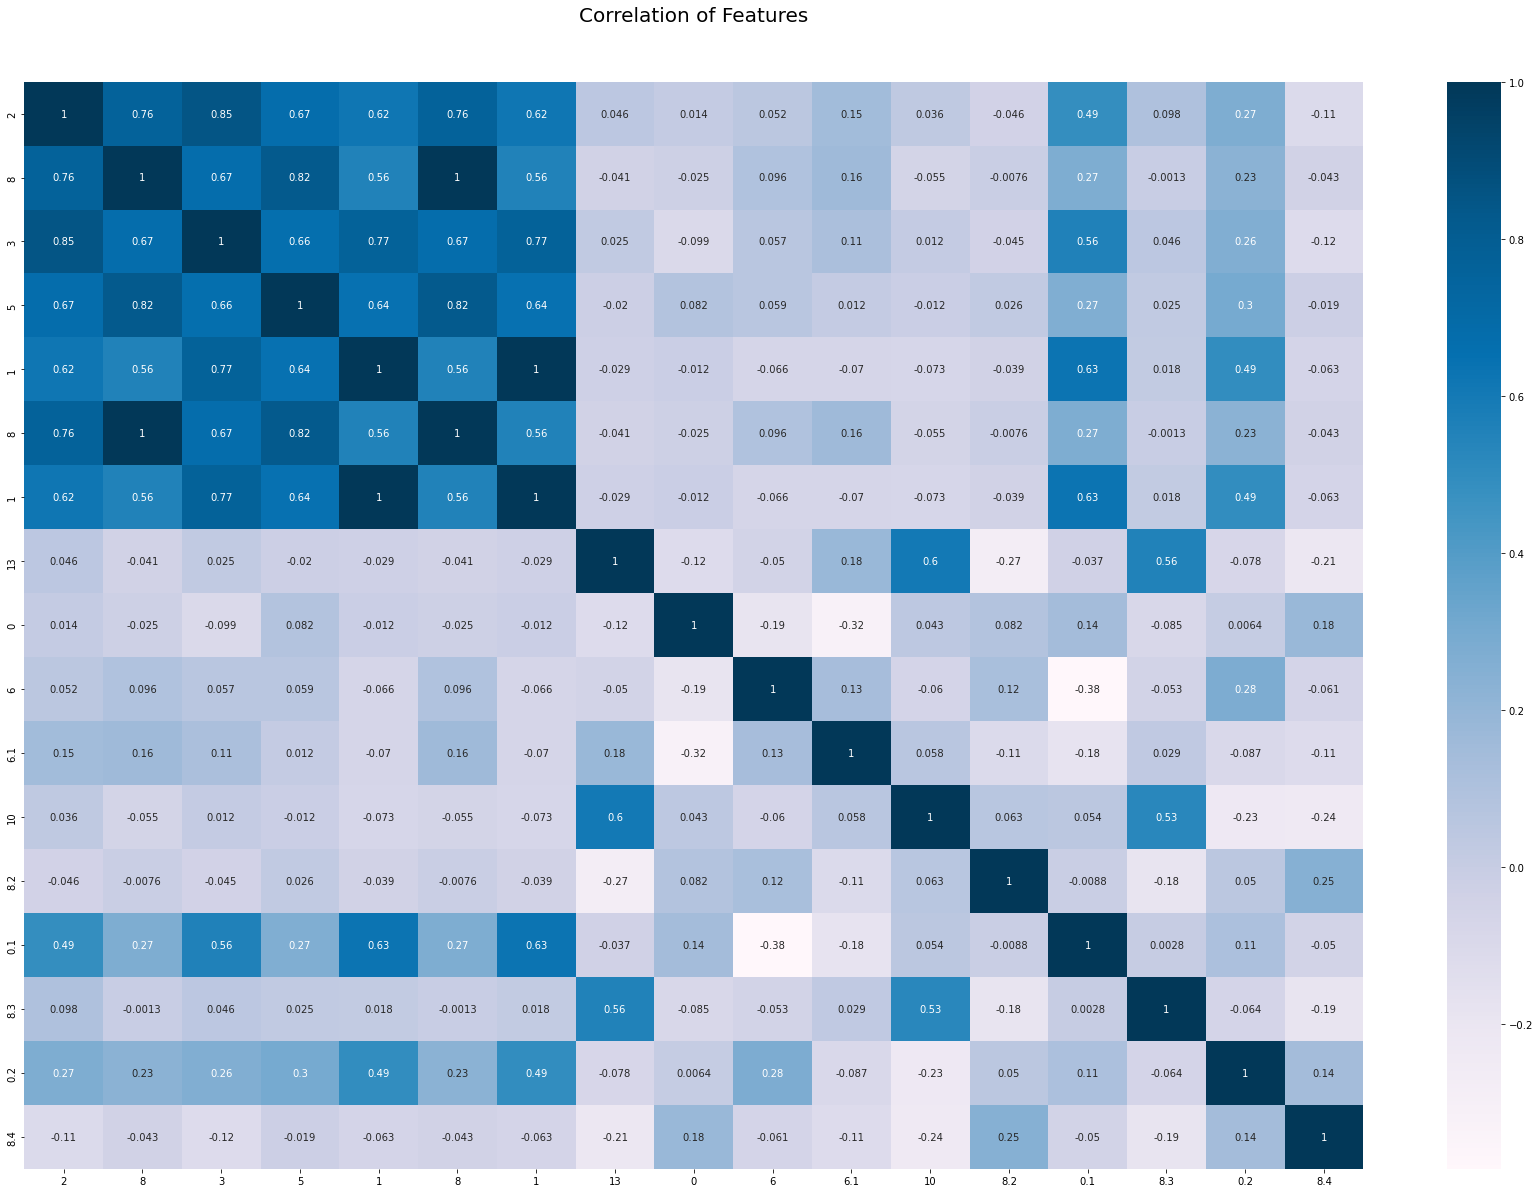

In [8]:
colormap = plt.cm.PuBu
# mask = np.zeros_like(writing, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(30, 20))
plt.title("Correlation of Features", y = 1.05, size = 20)
sns.heatmap(heatmap_data.astype(float).corr(),annot = True,cmap=colormap, )

In [49]:
x = writing.drop('T', axis = 1)
y = writing['T']
print(x)
y

       2   8  3  5  1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  8.4
0      5  12  3  7  2   10   5  5  4   13   3    9    2    8    4   10
1      4  11  6  8  6   10   6  2  6   10   3    7    3    7    3    9
2      7  11  6  6  3    5   9  4  6    4   4   10    6   10    2    8
3      2   1  3  1  1    8   6  6  6    6   5    9    1    7    5   10
4      4  11  5  8  3    8   8  6  9    5   6    6    0    8    9    7
...   ..  .. .. .. ..  ...  .. .. ..  ...  ..  ...  ...  ...  ...  ...
19994  2   2  3  3  2    7   7  7  6    6   6    4    2    8    3    7
19995  7  10  8  8  4    4   8  6  9   12   9   13    2    9    3    7
19996  6   9  6  7  5    6  11  3  7   11   9    5    2   12    2    4
19997  2   3  4  2  1    8   7  2  6   10   6    8    1    9    5    8
19998  4   9  6  6  2    9   5  3  1    8   1    8    2    7    2    8

[19999 rows x 16 columns]


0        I
1        D
2        N
3        G
4        S
        ..
19994    D
19995    C
19996    T
19997    S
19998    A
Name: T, Length: 19999, dtype: object

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
1443,2,3,4,4,0,7,10,2,2,8,12,8,1,11,0,8
6351,4,4,4,3,2,5,8,5,7,10,9,9,3,9,2,6
1535,3,5,5,3,2,7,7,3,7,11,5,8,1,8,5,8
11213,4,9,4,4,2,7,4,4,4,8,2,8,3,7,5,8
4245,4,4,5,2,3,7,11,3,2,6,9,8,7,11,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14592,2,1,3,1,1,7,8,4,0,7,8,8,7,9,0,8
3688,3,8,3,6,2,5,7,10,8,7,6,5,3,8,4,8
6078,1,3,2,2,1,8,7,5,3,9,6,8,2,8,2,8
16238,5,6,5,4,2,2,12,5,4,12,11,7,2,10,1,7


[0.95825, 0.9495, 0.95975, 0.95975, 0.962, 0.96, 0.95575, 0.9515, 0.95275, 0.95, 0.9495, 0.9475, 0.94675, 0.942, 0.941, 0.94075, 0.94, 0.937, 0.93675, 0.9365, 0.935, 0.93325, 0.933, 0.9295, 0.92725, 0.92825, 0.92825, 0.92725, 0.9265, 0.9255, 0.92275, 0.923, 0.92175, 0.91875, 0.91775, 0.9145, 0.91575, 0.91275, 0.911, 0.9105, 0.9085, 0.90825, 0.90525, 0.905, 0.9055, 0.904, 0.90225, 0.9025, 0.89975, 0.8975, 0.8955, 0.89375, 0.89425, 0.8945, 0.8935, 0.89275]


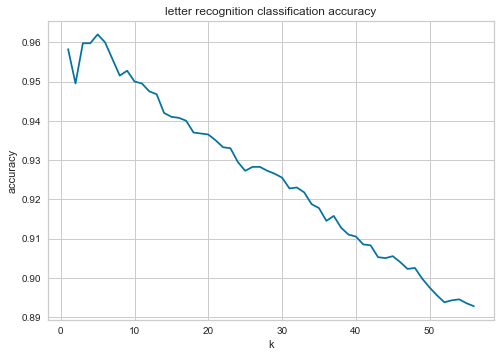

In [52]:
iteration =range(1,57)
accuracy=[]
for k in iteration:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  accuracy.append(knn.score(x_test, y_test))
print(accuracy)
plt.plot(iteration, accuracy)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("letter recognition classification accuracy")
plt.show()

In [16]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           A       0.93      0.99      0.96       144
           B       0.66      0.94      0.77       131
           C       0.86      0.82      0.84       155
           D       0.83      0.91      0.87       161
           E       0.86      0.81      0.83       157
           F       0.89      0.87      0.88       178
           G       0.82      0.89      0.85       167
           H       0.81      0.74      0.77       129
           I       0.95      0.92      0.94       153
           J       0.95      0.87      0.91       161
           K       0.90      0.81      0.85       140
           L       0.97      0.93      0.95       162
           M       0.95      0.89      0.92       152
           N       0.88      0.88      0.88       152
           O       0.71      0.91      0.80       131
           P       0.96      0.86      0.91       158
           Q       0.94      0.85      0.89       170
           R       0.81    

In [29]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.95625


C:\Users\haeun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


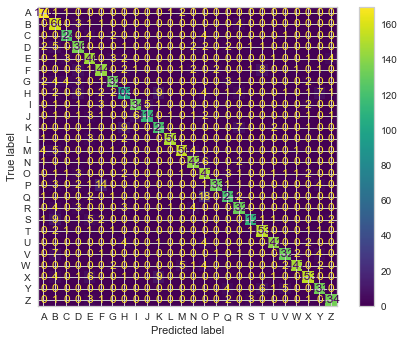

In [53]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

C:\Users\haeun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


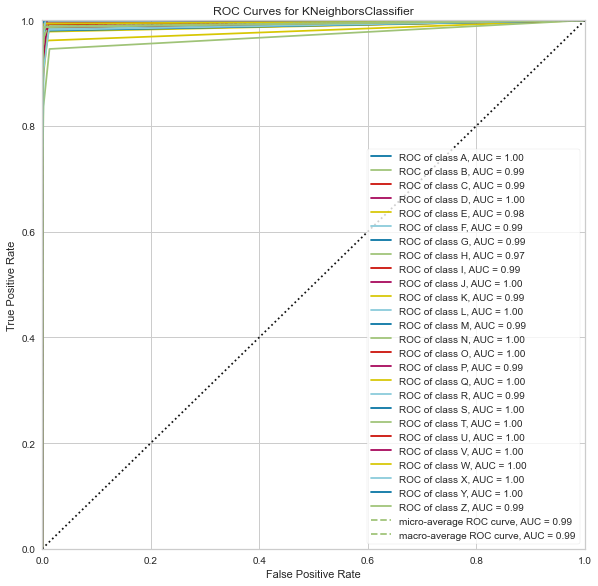

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [31]:
class_list=np.unique(y)
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(knn, classes=class_list,size=(700,700))
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()